<a href="https://colab.research.google.com/github/SamuelWanjiru/Twitter_sentiment_analysis/blob/main/TWITTER_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<font color='red'>🎯 TWITTER SENTIMENT ANALYSIS ~ HATE SPEECH RECOGNITION 😊🤬**

## **Connecting/mounting the google drive**

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### **IMPORTING NECESSARY LIBRARIES**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import model_selection, preprocessing, linear_model, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import ensemble
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from xgboost import XGBClassifier


import nltk

from nltk.corpus import stopwords
from textblob import Word
nltk.download('wordnet')

from termcolor import colored
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn import set_config
set_config(print_changed_only = False)

print(colored("\nLIBRARIES WERE SUCCESFULLY IMPORTED...", color = "green", attrs = ["dark", "bold"]))


LIBRARIES WERE SUCCESFULLY IMPORTED...


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### **Loading the dataset from google drive**

In [4]:
train_set = pd.read_csv(r"/content/gdrive/My Drive/KAGGLE PROJECTS/Twitter Sentiment Analysis/Data/train.csv",
                   encoding = "utf-8",
                   engine = "python",
                   header = 0)

test_set = pd.read_csv(r"/content/gdrive/My Drive/KAGGLE PROJECTS/Twitter Sentiment Analysis/Data/test.csv",
                   encoding = "utf-8",
                   engine = "python",
                   header = 0)

**The first five rows of train set**

In [5]:
train_set.head(n = 5).style.background_gradient(cmap = "summer")

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


**The first five rows of test set**

In [6]:
test_set.head(n = 5).style.background_gradient(cmap = "summer")

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"


### **Understanding the data**



Shape of the train and test datasets

In [7]:
print("Train set shape: ",train_set.shape,"Test set shape: ",test_set.shape)

Train set shape:  (31962, 3) Test set shape:  (17197, 2)


Displaying more information about the train set

In [8]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


Checking whether there are any duplicate values

In [9]:
print("There are {} duplicate values in the train set".format(train_set.duplicated().sum()))

There are 0 duplicate values in the train set


Check the distribution of classess in the label variable

In [10]:
train_set.groupby("label").count().style.background_gradient(cmap = "summer")

,id,tweet
label,,
0,29720,29720
1,2242,2242


## **Processing the dataset**

1. Converting uppercase letters to lowercase letters in the tweet column

In [11]:
train_set["tweet"] = train_set["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))
test_set["tweet"] = test_set["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

print(colored("\nCONVERTED SUCCESFULLY..."))


CONVERTED SUCCESFULLY...


2. Deleting all punctuation marks in the tweet column

In [12]:
train_set["tweet"] = train_set["tweet"].str.replace('[^\w\s]','')
test_set["tweet"] = test_set["tweet"].str.replace('[^\w\s]','')

print(colored("\nDELETED SUCCESFULLY..."))


DELETED SUCCESFULLY...


3. Deleting numbers from the tweet column

In [13]:
train_set['tweet'] = train_set['tweet'].str.replace('\d','')
test_set['tweet'] = test_set['tweet'].str.replace('\d','')

print(colored("\n NUMBERS DELETED SUCCESFULLY..."))


 NUMBERS DELETED SUCCESFULLY...


4. Deleting stopwords from tweet column

In [14]:
sw = stopwords.words("english")
train_set['tweet'] = train_set['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
test_set['tweet'] = test_set['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

print(colored("\nSTOPWORDS DELETED SUCCESFULLY..."))


STOPWORDS DELETED SUCCESFULLY...


5. Lemmatization. Getting roots of the words in the tweet column

In [15]:
train_set['tweet'] = train_set['tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
test_set['tweet'] = test_set['tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

print(colored("\nDONE SUCCESFULLY..."))


DONE SUCCESFULLY...


6. Droping the id column

In [16]:
train_set = train_set.drop("id", axis = 1)
test_set = test_set.drop("id", axis = 1)

print(colored("\n'ID' COLUMNS DROPPED SUCCESFULLY..."))


'ID' COLUMNS DROPPED SUCCESFULLY...


### **Looking at the train & test set after cleaning**

In [17]:
train_set.head(n = 10)

,label,tweet
0,0,user father dysfunctional selfish drag kid dys...
1,0,user user thanks lyft credit cant use cause do...
2,0,bihday majesty
3,0,model love u take u time urð ðððð ððð
4,0,factsguide society motivation
5,0,huge fan fare big talking leave chaos pay disp...
6,0,user camping tomorrow user user user user user...
7,0,next school year year examsð cant think ð scho...
8,0,love land allin cavs champion cleveland clevel...
9,0,user user welcome im gr


In [18]:
test_set.head(n = 10)

,tweet
0,studiolife aislife requires passion dedication...
1,user white supremacist want everyone see new â...
2,safe way heal acne altwaystoheal healthy healing
3,hp cursed child book reservation already yes ð...
4,rd bihday amazing hilarious nephew eli ahmir u...
5,choose momtips
6,something inside dy ððâ eye ness smokeyeyes ti...
7,finishedtattooinkedinkloveitâï âïâïâïâï thanks...
8,user user user never understand dad left young...
9,delicious food lovelife capetown mannaepicure ...


### **Dividing the datasets**

In [19]:
x = train_set["tweet"]
y = train_set["label"]

train_x, test_x, train_y, test_y = model_selection.train_test_split(x, y, test_size = 0.20, shuffle = True, random_state = 11)

print(colored("\nDIVIDED SUCCESFULLY..."))


DIVIDED SUCCESFULLY...


## **Data Vectorization**

Word Embeddings or Word vectorization is a methodology in NLP to map words or phrases from vocabulary to a corresponding vector of real numbers which used to find word predictions, word similarities/semantics.

For more info, read[here](https://towardsdatascience.com/understanding-nlp-word-embeddings-text-vectorization-1a23744f7223)

**"TF-IDF" method**

In [20]:
tf_idf_word_vectorizer = TfidfVectorizer()
tf_idf_word_vectorizer.fit(train_x)

x_train_tf_idf_word = tf_idf_word_vectorizer.transform(train_x)
x_test_tf_idf_word = tf_idf_word_vectorizer.transform(test_x)

x_train_tf_idf_word.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### **BUILDING MACHINE LEARNING MODELS**

### **1. Logistic regression model**

In [21]:
logistic_model = linear_model.LogisticRegression()

**Fitting the model**

In [22]:
log_model_fit = logistic_model.fit(x_train_tf_idf_word, train_y)

**Assessing the model performance**

In [23]:
accuracy = model_selection.cross_val_score(log_model_fit,
                                           x_test_tf_idf_word,
                                           test_y,
                                           cv = 20).mean()

In [24]:
print(colored("\nLogistic regression model"))
print(colored("Accuracy ratio: "), accuracy)


Logistic regression model
Accuracy ratio:  0.9307072884012537


### **2. XGBoost model**

In [25]:
xgb = XGBClassifier()

**Fitting the model**

In [26]:
xgb_model = xgb.fit(x_train_tf_idf_word,train_y)

**Assessing the model performance**

In [27]:
accuracy = model_selection.cross_val_score(xgb_model, 
                                           x_test_tf_idf_word, 
                                           test_y, 
                                           cv = 20).mean()

In [28]:
print(colored("\nXGBoost model"))
print(colored("Accuracy ratio: "), accuracy)


XGBoost model
Accuracy ratio:  0.9353991967084638


### **3. Light GBM model**

In [29]:
lgbm = LGBMClassifier()

**Fitting the model**

In [30]:
lgbm_model = lgbm.fit(x_train_tf_idf_word,train_y)

**Assessing the model performance**

In [31]:
accuracy = model_selection.cross_val_score(lgbm_model,
                                           x_test_tf_idf_word,
                                           test_y,
                                           cv = 20).mean()

In [32]:
print(colored("\nLight GBM model"))
print(colored("Accuracy ratio: "), accuracy)


Light GBM model
Accuracy ratio:  0.9368064263322886


### **ROC AUC (curvature)**

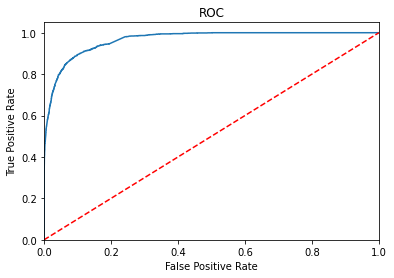

In [33]:
y = train_y
X = x_train_tf_idf_word

logit_roc_auc = roc_auc_score(y, lgbm_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, lgbm_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

## **VISUALIZATION WITH WORD CLOUD**

In [34]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [35]:
tw_mask = np.array(Image.open(r"/content/gdrive/My Drive/KAGGLE PROJECTS/Twitter Sentiment Analysis/Data/twitter_mask3.jpg"))

In [36]:

text = " ".join(i for i in train_set.tweet)

In [37]:
wc = WordCloud(background_color = "white",
               width = 600, mask = tw_mask,
               height = 600,
               contour_width = 0,
               contour_color = "red",
               max_words = 1000,
               scale = 1,
               collocations = False,
               repeat = True,
               min_font_size = 1)

In [38]:
wc.generate(text)

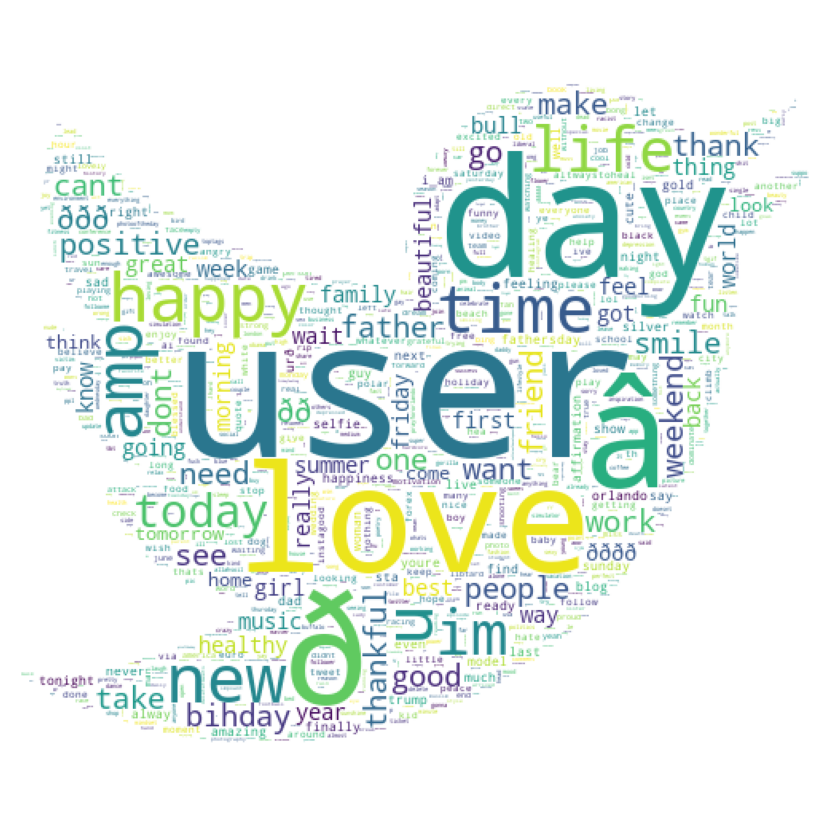

In [39]:
plt.figure(figsize = [15, 15])
plt.imshow(wc)
plt.axis("off")
plt.show;